In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#NLP Text Libraries
import string
import re
import nltk
import nltk.corpus
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jovit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jovit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jovit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [6]:
df = pd.read_csv("data.txt", delimiter=';', header=None, names=['text','label'])

In [7]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [9]:
# check null
df.isnull().sum()

text     0
label    0
dtype: int64

In [10]:
# checking duplicates
df["text"].duplicated().sum()

np.int64(31)

In [11]:
# keeps first occurrence, removes duplicates
df = df.drop_duplicates(subset=["text"])

In [12]:
# checking duplicates
df["text"].duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15969 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    15969 non-null  object
 1   label   15969 non-null  object
dtypes: object(2)
memory usage: 374.3+ KB


In [14]:
df['label'].value_counts()

label
joy         5350
sadness     4664
anger       2155
fear        1933
love        1299
surprise     568
Name: count, dtype: int64

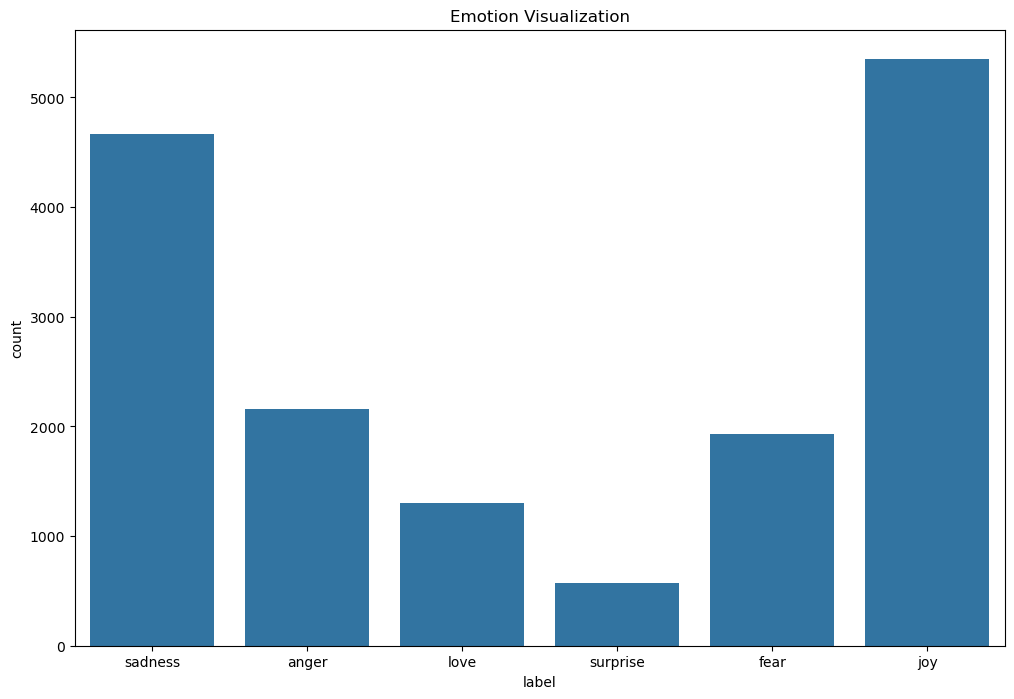

In [15]:
# visualization 
plt.figure(figsize=(12, 8))
sns.countplot(x='label', data=df)
plt.title('Emotion Visualization')
plt.show()

In [16]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [17]:
def clean_text(text):
    text = text.lower() # make it lowercase 
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = re.sub(r'\d+', '', text) # remove numbers in the text
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove urls
    text = re.sub(r'\n', ' ', text)  # replace newlines with space
    text = re.sub(r'(\w)\1{2,}', r'\1', text)

    tokens = word_tokenize(text)

    # remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # join tokens back into a sentence
    cleaned_text = " ".join(lemmatized_tokens)

    return cleaned_text

In [18]:
df['text'] = df['text'].apply(clean_text)
df.head(10)

,text,label
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger
5,ive feeling little burdened lately wasnt sure,sadness
6,ive taking milligram time recommended amount i...,surprise
7,feel confused life teenager jaded year old man,fear
8,petronas year feel petronas performed well mad...,joy
9,feel romantic,love


In [19]:
X = df['text']
y= df['label']

In [20]:
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [22]:
print(f'Total Data Train    : {len(X_train)}')
print(f'Total Data Validasi : {len(X_val)}')
print(f'Total Data Test     : {len(X_test)}')

Total Data Train    : 11178
Total Data Validasi : 2395
Total Data Test     : 2396


In [23]:
vectorizer = TfidfVectorizer()
Xv_train = vectorizer.fit_transform(X_train)

In [24]:
Xv_val = vectorizer.transform(X_val)

In [25]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced']
}

svc = LinearSVC(dual=False)
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xv_train, y_train)

print(grid_search.best_params_)

{'C': 1, 'class_weight': 'balanced', 'loss': 'squared_hinge', 'penalty': 'l2'}


c:\Users\jovit\miniconda3\envs\warasin_env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jovit\miniconda3\envs\warasin_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jovit\miniconda3\envs\warasin_env\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jovit\miniconda3\envs\warasin_env\Lib\site-pack

In [26]:
clf = LinearSVC(C=1, class_weight='balanced', loss='squared_hinge', penalty='l2')
clf.fit(Xv_train, y_train)

LinearSVC(C=1, class_weight='balanced')

In [27]:
Xv_test = vectorizer.transform(X_test)

In [28]:
y_pred = clf.predict(Xv_test)

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8877295492487479
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       305
           1       0.83      0.86      0.84       283
           2       0.91      0.91      0.91       769
           3       0.79      0.80      0.79       229
           4       0.94      0.93      0.93       714
           5       0.78      0.71      0.74        96

    accuracy                           0.89      2396
   macro avg       0.85      0.85      0.85      2396
weighted avg       0.89      0.89      0.89      2396



In [30]:
def predict_emotion(text, model, vectorizer, encoder):
    text_tfidf = vectorizer.transform([text])
    predicted_label = model.predict(text_tfidf)[0]
    emotion = encoder.inverse_transform([predicted_label])[0]
    
    return emotion

In [31]:
text = "this week has been going really well for me i love it!"
predicted_emotion = predict_emotion(text, clf, vectorizer, encoder)
print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: joy


In [32]:
text2 = "Lately, I’ve been feeling really down. No matter how much effort I put into my work, it seems like nothing is good enough. I feel exhausted, and even when I'm surrounded by people, I feel so alone."

predicted_emotion = predict_emotion(text2, clf, vectorizer, encoder)
print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: sadness


In [33]:
# save the model
import joblib

joblib.dump(encoder, "label_encoder.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(clf, 'linear_svc_model.pkl')

['linear_svc_model.pkl']